# SuperBowl Viewership Analysis

In [2]:
#import data
import pandas as pd

# Load the CSV data into DataFrames
super_bowls = pd.read_csv("datasets/super_bowls.csv")
tv = pd.read_csv("datasets/tv.csv")
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")


In [3]:
#Superbowls data frame
super_bowls.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [4]:
#tv dataframe
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [5]:
#half_time_musicians
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


# Identifying Null Values 
The datasets might have null values. From the first five columns of super_bowl data we could see that qb_winner_2 and qb_loser_2 having missing values. This is because most of the times qb_winner_1 and qb_loser_1 will play the entire game.

To know the missing values in TV dataframe and muscians we use .info(). This helps us identify various rows with null values.

1. total_us_viewers(amount of U.S. viewers who watched at least some part of the broadcast),rating_18_49(average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast),share_18_49(average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast) have null values in TV data set.
2. num_songs(number of songs performed) has missing values in musicians data set

In [6]:
#null values in Superbowl dataframe
super_bowls.info()
#null values in TV dataframe
tv.info()
#null values in Musicians dataframe
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

# Uncovering some insights
To understand the range of combined points of superbowl games a histogram is plotted. 
Also, the superbowl with lowest combined points and highest combined points is identified.
1. Most of the combined points are in the range 40 to 50 

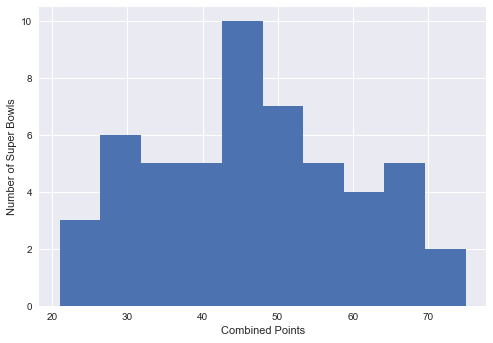

Super bowl with highest combined points


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


Super bowl with Lowest combined points


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [7]:
from matplotlib import pyplot as plt
#%matplotlib inline
plt.style.use('seaborn')
#histogram
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

#highest and lowest games
print("Super bowl with highest combined points")
display(super_bowls[super_bowls['combined_pts'] > 70])
print("Super bowl with Lowest combined points")
display(super_bowls[super_bowls['combined_pts']< 25])


### Point Difference
A histogram of point difference and the games with high and low point difference is discovered.
1. Most of the games are close and highest being 45


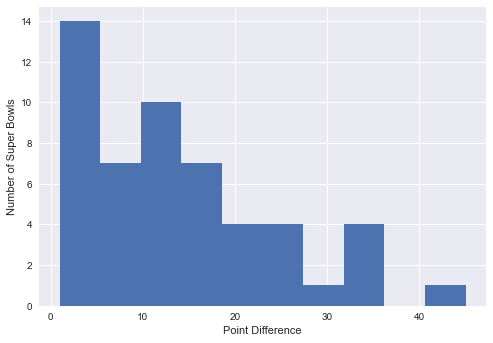

Super bowl with low point difference


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


Super bowl with high point difference


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [8]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
print("Super bowl with low point difference")
display(super_bowls[super_bowls.difference_pts==1])
print("Super bowl with high point difference")
display(super_bowls[super_bowls.difference_pts>=35])

# High point difference means lost viewers?? 
When point difference is more the games become less interesting and the viewership might get affected. 
The dataframes are merged and the relatinship is plotted to get more insights.

1. Though our intuition is right still there is no strong linear relationship that exists. 


<AxesSubplot:xlabel='difference_pts', ylabel='share_household'>

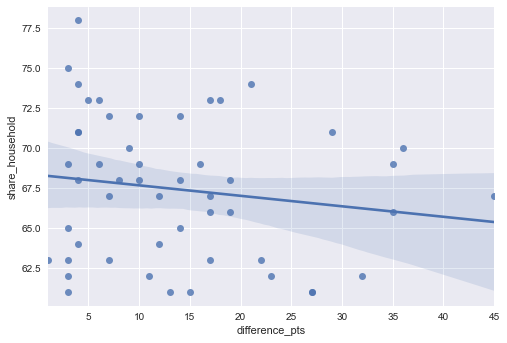

In [9]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

## Viewership Analysis

1. Result- The viewers and ratings went high but the ad cost had delayed increase. 

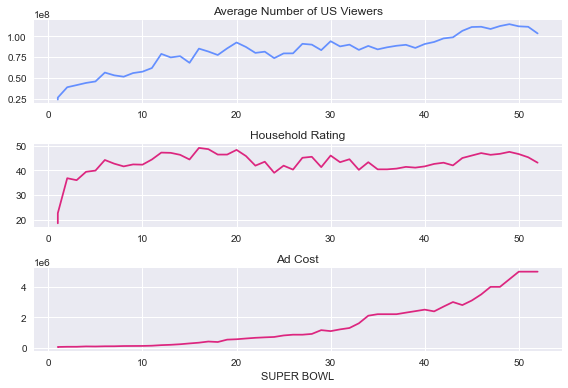

In [10]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household,color='#DC267F' )
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost,color='#DC267F' )
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

## Musician data analysis
It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out.

1. The most performed musician in the super bowl game is found


In [11]:
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)
halftime_appearances[halftime_appearances['super_bowl']>1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


### Distribution of number songs and finding the max and min

There is a lot of missing values for number of songs when it comes to marching band. The data is filtered and the distribution is plotted. The maximum of 11 songs is performed and most of the non-band performers perform 1 to 3 songs and we know that halftimeshow timing is fixed and it is roughly 12 mins.

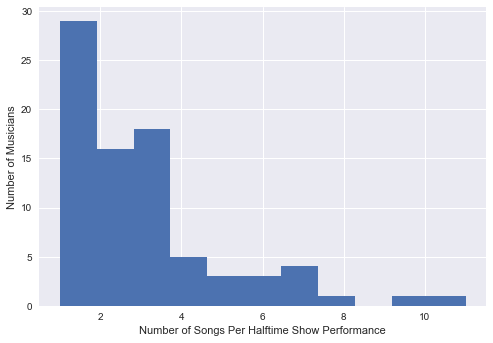

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [14]:
# Filter out most marching bands
no_marching_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_marching_bands = no_marching_bands[~no_marching_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_marching_bands['num_songs'].values))
plt.hist(no_marching_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# sorting and displaying
no_marching_bands = no_marching_bands.sort_values('num_songs', ascending=False)
display(no_marching_bands.head(15))